## Getting started / Setup

1. Importing libaries & DataFrame
2. Take a quick, first look at the Data (.head()) - is everything ok?

In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np; np.random.seed(0)
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
import statsmodels.api as sms
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn')

In [153]:
property = pd.read_csv('King_County_House_prices_dataset.csv', delimiter=',')

In [154]:
property.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## 1. Business Understanding & Data Mining

**Getting a feeling for my data**
- Develop a rare understanding for my Data & Business Case
- Writing down frist insights and relevant questions 
- Check number of columns and rows, take a closer look at the column names, data types etc.

**Research:**
- Deep dive into the topic (google etc.) - Do I have any background information/refernces 
- Writing down specific issues / questions I (still) need to answer

### Getting a feeling for my data

In [155]:
property.shape

(21597, 21)

In [156]:
property.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [158]:
property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [159]:
property.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [160]:
property.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [161]:
property.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [162]:
# property.tail()

In [163]:
# property.sample(5)

## Research:

**General Information - King County**
- County of US-Department in Washington
- Inhabitants: 1.9 Million
- County Seat/Capital: Seattle
- [Further Information](https://de.wikipedia.org/wiki/King_County_(Washington))

**Background Information - [King County Properies](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#d)**
- **Building Condition** = relative to age and grade. Codes from 1-5 (1 = Poor-Warn out. 2 = Fair - badly worn. 3 = Average. 4 = Good. 5 = very Good.) **note:** Might be important for the price / recommendation? 
-  **Grade** = Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. (See Glossary in Area Report for Residential Building Grades in use by the King County Department of Assessments.) / Building Grad = Represents the construction quality of improvements. Grades run from grade 1 to 13. **note:** Might be important for the price / recommendation? 

**Common cirteria for buying a house:** (see below)
[Immowelt](https://www.immoverkauf24.de/baufinanzierung/immobilienkauf/hauskauf/)
[Maklerscout](https://maklerscout.com/allgemein/hauskauf-alles-was-man-wissen-muss)
[maklaro](https://www.maklaro.de/immobilien-news/wohnflaeche-ein-wichtiges-mas-im-immobilienmarkt)
[mcmakler](https://www.mcmakler.de/ratgeber/immobilienbewertung/zeitwert-berechnen#zeitwert-ermitteln-die-wichtigsten-einflussfaktoren)

**Which variables might be important when I buy a house?**
- *Size matters* - sqft_living & sqft_lot might be important (price context)
- *rooms* - how many bedrooms, bathrooms etc.
- Criteria *property condition* is important (criteria condition or grading)
- *Location* is important - Can I create a feature out of waterfront, zipcode, lat, long (infrastructure?)
- *Year of construction* is important - it might equire extensive modernisation and renovation
- *neighbourhood* is important - Unsure if I can I crate a feature 'neighbourhood' (sqft_living15 and sqft_lot15)
- *age of property* - is there any difference, when I buy a brend new house or a 'mid ager'
- *infrastructure* (school, roads, airport)

**Important for buyers**
- best house for best price
- personal criteria e.g. I would like to live at the waterfront, central city area, I need 3 bedrooms ... 

**Important for sellers**
- get as much money as possible
- dont want to have a lot of work selling the house (easy process)

**Task**
- **First goal:** Recommendations for home sellers and/or buyers in King County. 
- **Second goal** Predict the price for each house (target variable = price)


### Keep in mind
- Found an article [when its the best time to sell you house](https://www.theadvisory.co.uk/house-selling/best-time-to-sell-house/) 
- [Property Tax Differences](https://www.homes.com/blog/2018/05/property-tax-got-you-in-a-bind-heres-where-to-buy-in-the-pacific-northwest-to-enjoy-lower-property-tax/) and another [article](https://dor.wa.gov/about/statistics-reports/property-tax-statistics)
- Why is a bathroom labeld e.g. with 3.25? - [article concering the criteria for bathrooms](https://www.blaketeamrealty.com/12-bath-14-bath-34-bath-mean/)

## 02. Data Cleaning / Preparation

Tried to find out if: 
- There are any missings 
- Do I have to improve / edit my dataset 

In [164]:
property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


We have 2 object data types out of 21 columns:
- date
- sqft_basement

In [165]:
# 1. Null-Value
missing = pd.DataFrame(property.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/property.shape[0]*100,1)
missing[missing.Number!=0]

,Number,Percentage
waterfront,2376,11.0
view,63,0.3
yr_renovated,3842,17.8


Of the 21 columns we do have 3 with missing values.
- waterfront has 11.0 percent missing values - just a hint, those objects aren't at the waterfront?
- view = only 0.3 missing values 
- yr_renovated has 17.8 % missing values - that might be the new houses / no renovations necessary

In [166]:
# split date to year and month and delete date later 
property['date'] = pd.to_datetime(property['date'])
property['year'] = property['date'].dt.year 
property['month'] = property['date'].dt.month 

In [167]:
# convert sqft_living to meters
property['sqm_living'] = property['sqft_living'] * 0.092903
property['sqm_living'] = property.sqm_living.round(2)

In [168]:
# convert sqft_lot to meters
property['sqm_lot'] = property['sqft_lot'] * 0.092903
property['sqm_lot'] = property.sqm_lot.round(2)

In [169]:
# convert sqft_above to meters
property['sqm_above'] = property['sqft_above'] * 0.092903
property['sqm_above'] = property.sqm_lot.round(2)

In [170]:
# change dtype sqft_basement
property.sqft_basement = pd.to_numeric(property.sqft_basement, errors='coerce')

In [171]:
# cleaning variable view, there are only 0.3  missings
property.view = property.view.fillna(0.0)

In [172]:
# add a new coloum age
property['age'] = 2015 - property['yr_built']

In [173]:
# add a new coloum time to renovation (still habe to do it)
# property['renov_time'] = property['yr_built'] - property['yr_renovated']

In [174]:
# new coloum 'cities' - switch the zip code to city
property['city'] = property['zipcode'].replace([98001, 98002, 98071, 98092, 98224, 98004, 98005, 98006, 98007, 98008, 98009, 98015, 98010, 98011, 98041, 98013, 98014, 98019, 98022, 98024, 98003, 98023, 98063, 98093, 98025 , 98027, 98029, 98028, 98030, 98031, 98032, 98035, 98042, 98064, 98089, 98033, 98034, 98083, 98038, 98039, 98040, 98045, 98047, 98050, 98051, 98052, 98053, 98073, 98055, 98056, 98057, 98058, 98059, 98074, 98075, 98062, 98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98111, 98112, 98113, 98114, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98124, 98125, 98126, 98127, 98129, 98131, 98132, 98133, 98134, 98136, 98138, 98139, 98141, 98144, 98145, 98146, 98148, 98154, 98155, 98158, 98160, 98161, 98164, 98165, 98166, 98168, 98170, 98174, 98175, 98177, 98178, 98181, 98185, 98188, 98189, 98190, 98191, 98194, 98195, 98198, 98199, 98288, 98065, 98070, 98072, 98077]\
                                                   ,['Auburn', 'Auburn', 'Auburn', 'Auburn', 'Baring', 'Bellevue', 'Bellevue', 'Bellevue', 'Bellevue', 'Bellevue', 'Bellevue', 'Bellevue', 'Black Diamond', 'Bothell', 'Bothell', 'Burton', 'Carnation', 'Duvall', 'Enumclaw', 'Fall City', 'Federal Way', 'Federal Way', 'Federal Way', 'Federal Way', 'Hobart', 'Issaquah', 'Issaquah', 'Kenmore', 'Kent', 'Kent', 'Kent', 'Kent', 'Kent', 'Kent', 'Kent', 'Kirkland', 'Kirkland', 'Kirkland', 'Maple Valley', 'Medina', 'Mercer Island', 'North Bend', 'Pacific', 'Preston', 'Ravensdale', 'Redmond', 'Redmond', 'Redmond', 'Renton', 'Renton', 'Renton', 'Renton', 'Renton', 'Sammamish', 'Sammamish', 'Seahurst', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Skykomish', 'Snoqualmie', 'Vashon', 'Woodinville', 'Woodinville'])

In [175]:
# change the price to K
property['price'] = property['price'] / 1000

In [176]:
# convert sqft_basement to meters
property['sqm_basement'] = property['sqft_basement'] * 0.092903
property['sqm_basement'] = property.sqm_lot.round(2)

In [177]:
#clear yr_renovated
property.yr_renovated.value_counts(dropna=False)

 0.0       17011
NaN         3842
 2014.0       73
 2003.0       31
 2013.0       31
 2007.0       30
 2005.0       29
 2000.0       29
 1990.0       22
 2004.0       22
 2009.0       21
 1989.0       20
 2006.0       20
 2002.0       17
 1991.0       16
 1998.0       16
 1984.0       16
 1999.0       15
 2001.0       15
 2008.0       15
 2010.0       15
 1983.0       15
 2015.0       14
 1986.0       14
 1987.0       14
 1994.0       14
 1985.0       14
 1992.0       13
 1995.0       12
 1997.0       12
           ...  
 1964.0        5
 1975.0        5
 1973.0        4
 1981.0        4
 1963.0        4
 1969.0        4
 1965.0        4
 1972.0        3
 1956.0        3
 1945.0        3
 1960.0        3
 1978.0        3
 1958.0        3
 1955.0        3
 1974.0        2
 1962.0        2
 1967.0        2
 1940.0        2
 1957.0        2
 1946.0        1
 1959.0        1
 1951.0        1
 1954.0        1
 1950.0        1
 1971.0        1
 1944.0        1
 1948.0        1
 1976.0       

In [178]:
# clear yr_renovated
property.yr_renovated = property.yr_renovated.fillna(0)

In [179]:
# clear waterfront
property = property[property.waterfront.isna()==False]

In [180]:
# drop the id - dont need it
property = property.drop(['id'],axis=1)

In [181]:
# drop year built - created a new feature 'age'
property = property.drop(['yr_built'],axis=1)

In [182]:
# drop the date - created a new column "year" and "month"
property = property.drop(['date'],axis=1)

In [183]:
# drop the sgft_living and sqft_lot - converted it to meters and added a new coloumn each
property = property.drop(['sqft_living'],axis=1)

In [184]:
# drop the sgft_living and sqft_lot - converted it to meters and added a new coloumn each
property = property.drop(['sqft_lot'],axis=1)

In [185]:
# drop the sgft_living and sqft_lot - converted it to meters and added a new coloumn each
property = property.drop(['sqft_above'],axis=1)

In [186]:
# drop the sgft_living and sqft_lot - converted it to meters and added a new coloumn each
property = property.drop(['sqft_basement'],axis=1)

In [187]:
# maybe?? drop view - no idea how to work with it
# property = property.drop(['view'],axis=1)

In [188]:
#checked the data for bedrooms == 33 and decided to drop it 
#property[property.bedrooms == 33]
property = property.drop(property[property.bedrooms == 33].index)

In [189]:
property.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_renovated,zipcode,...,sqft_living15,sqft_lot15,year,month,sqm_living,sqm_lot,sqm_above,age,city,sqm_basement
1,538.0,3,2.25,2.0,0.0,0.0,3,7,1991.0,98125,...,1690,7639,2014,12,238.76,672.80,672.80,64,Seattle,672.80
2,180.0,2,1.00,1.0,0.0,0.0,3,6,0.0,98028,...,2720,8062,2015,2,71.54,929.03,929.03,82,Kenmore,929.03
3,604.0,4,3.00,1.0,0.0,0.0,5,7,0.0,98136,...,1360,5000,2014,12,182.09,464.52,464.52,50,Seattle,464.52
4,510.0,3,2.00,1.0,0.0,0.0,3,8,0.0,98074,...,1800,7503,2015,2,156.08,750.66,750.66,28,Sammamish,750.66
5,1230.0,4,4.50,1.0,0.0,0.0,3,11,0.0,98053,...,4760,101930,2014,5,503.53,9469.60,9469.60,14,Redmond,9469.60


In [190]:
property.dtypes

price            float64
bedrooms           int64
bathrooms        float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
year               int64
month              int64
sqm_living       float64
sqm_lot          float64
sqm_above        float64
age                int64
city              object
sqm_basement     float64
dtype: object

### Define continious and categorical variables
- **continous**: price, yr_renocated, sqft_living15, sqft_lot15, year, month, sqm_living, sqm_lot, sqm_above, age, sqm_basement
- **categorical**: bedrooms, bathrooms, floors, waterfront, view, condition, grade, city
- **unsure** zipcode, lat, long,

In [191]:
property.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'sqm_living', 'sqm_lot',
       'sqm_above', 'age', 'city', 'sqm_basement'],
      dtype='object')

In [193]:
# check for categorical values
cats = pd.DataFrame(property.nunique(), columns=["UniqueValues"])
cats

,UniqueValues
price,3391
bedrooms,11
bathrooms,29
floors,6
waterfront,2
view,5
condition,5
grade,11
yr_renovated,70
zipcode,70


In [192]:
# property.dtypes

In [194]:
# define continious & categorical variables
continuous_var = ['price', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'year', 'month', 'sqm_living', 'sqm_lot', 'sqm_above', 'age', 'sqm_basement', 'price_per_sqm_living', 'price_per_sqm_lot']
categorical_var = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'city', 'zipcode']

### Correlation Matrix

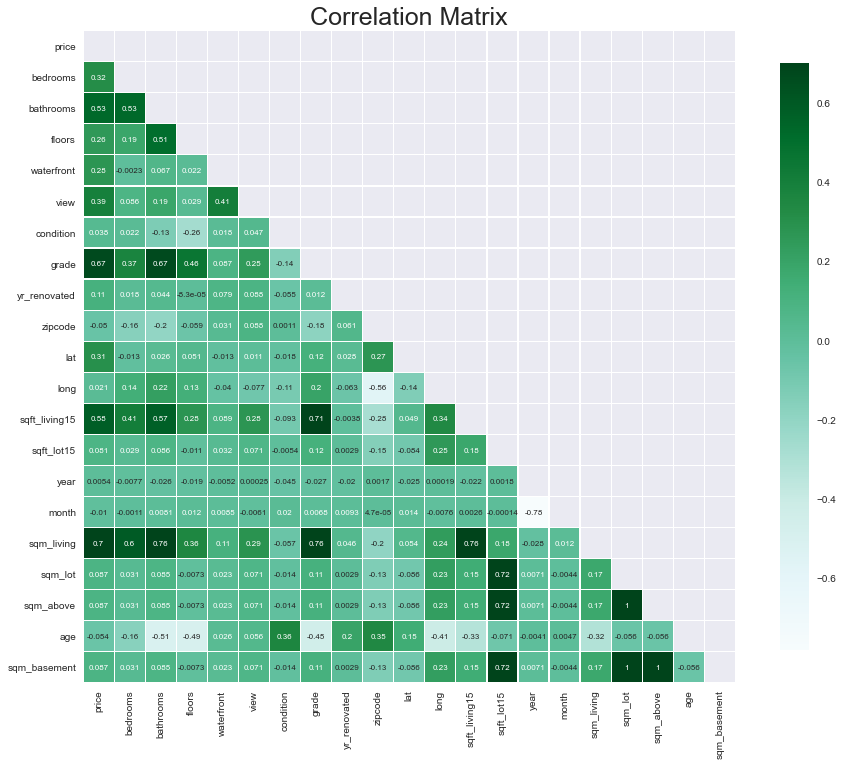

In [195]:
mask = np.zeros_like(property.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Correlation Matrix',fontsize=25)

sns.heatmap(property.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

### Correlation

In [196]:
property[['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'year', 'month', 'sqm_living', 'sqm_lot', 'sqm_above',
       'age', 'city', 'sqm_basement']].corr()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_renovated,zipcode,sqft_living15,sqft_lot15,year,month,sqm_living,sqm_lot,sqm_above,age,sqm_basement
price,1.000000,0.317742,0.527360,0.258295,0.276297,0.393546,0.038010,0.667238,0.111211,-0.050219,0.582195,0.081248,0.005445,-0.010274,0.704665,0.087008,0.087008,-0.053537,0.087008
bedrooms,0.317742,1.000000,0.531243,0.188995,-0.002303,0.086172,0.021583,0.370907,0.017672,-0.156819,0.405599,0.029003,-0.007747,-0.001093,0.595019,0.030598,0.030598,-0.163255,0.030598
bathrooms,0.527360,0.531243,1.000000,0.506205,0.067281,0.186573,-0.126387,0.666886,0.043524,-0.202151,0.570054,0.085885,-0.025922,0.008100,0.756338,0.085089,0.085089,-0.507005,0.085089
floors,0.258295,0.188995,0.506205,1.000000,0.021879,0.029174,-0.263421,0.458104,-0.000083,-0.058871,0.280888,-0.011008,-0.019253,0.011833,0.357171,-0.007257,-0.007257,-0.490232,-0.007257
waterfront,0.276297,-0.002303,0.067281,0.021879,1.000000,0.405107,0.017656,0.087381,0.079244,0.031059,0.088858,0.032000,-0.005166,0.008469,0.110229,0.023142,0.023142,0.026083,0.023142
view,0.393546,0.086172,0.186573,0.029174,0.405107,1.000000,0.047135,0.248320,0.088382,0.087655,0.276220,0.070926,0.000246,-0.006130,0.285188,0.070778,0.070778,0.055795,0.070778
condition,0.038010,0.021583,-0.126387,-0.263421,0.017656,0.047135,1.000000,-0.144465,-0.054896,0.001130,-0.092595,-0.005384,-0.044971,0.019504,-0.057412,-0.014087,-0.014087,0.361943,-0.014087
grade,0.667238,0.370907,0.666886,0.458104,0.087381,0.248320,-0.144465,1.000000,0.011594,-0.184366,0.714039,0.120191,-0.027056,0.006827,0.764050,0.114572,0.114572,-0.446286,0.114572
yr_renovated,0.111211,0.017672,0.043524,-0.000083,0.079244,0.088382,-0.054896,0.011594,1.000000,0.061170,-0.003830,0.002863,-0.020337,0.009274,0.045997,0.002865,0.002865,0.201335,0.002865
zipcode,-0.050219,-0.156819,-0.202151,-0.058871,0.031059,0.087655,0.001130,-0.184366,0.061170,1.000000,-0.278198,-0.146139,0.001688,0.000047,-0.196385,-0.129718,-0.129718,0.346023,-0.129718


### First conclusion, I might focus on: 
- sqm_living
- grade
- bathrooms
- sqft_living15
- view 

**Pairplot for continous variable**

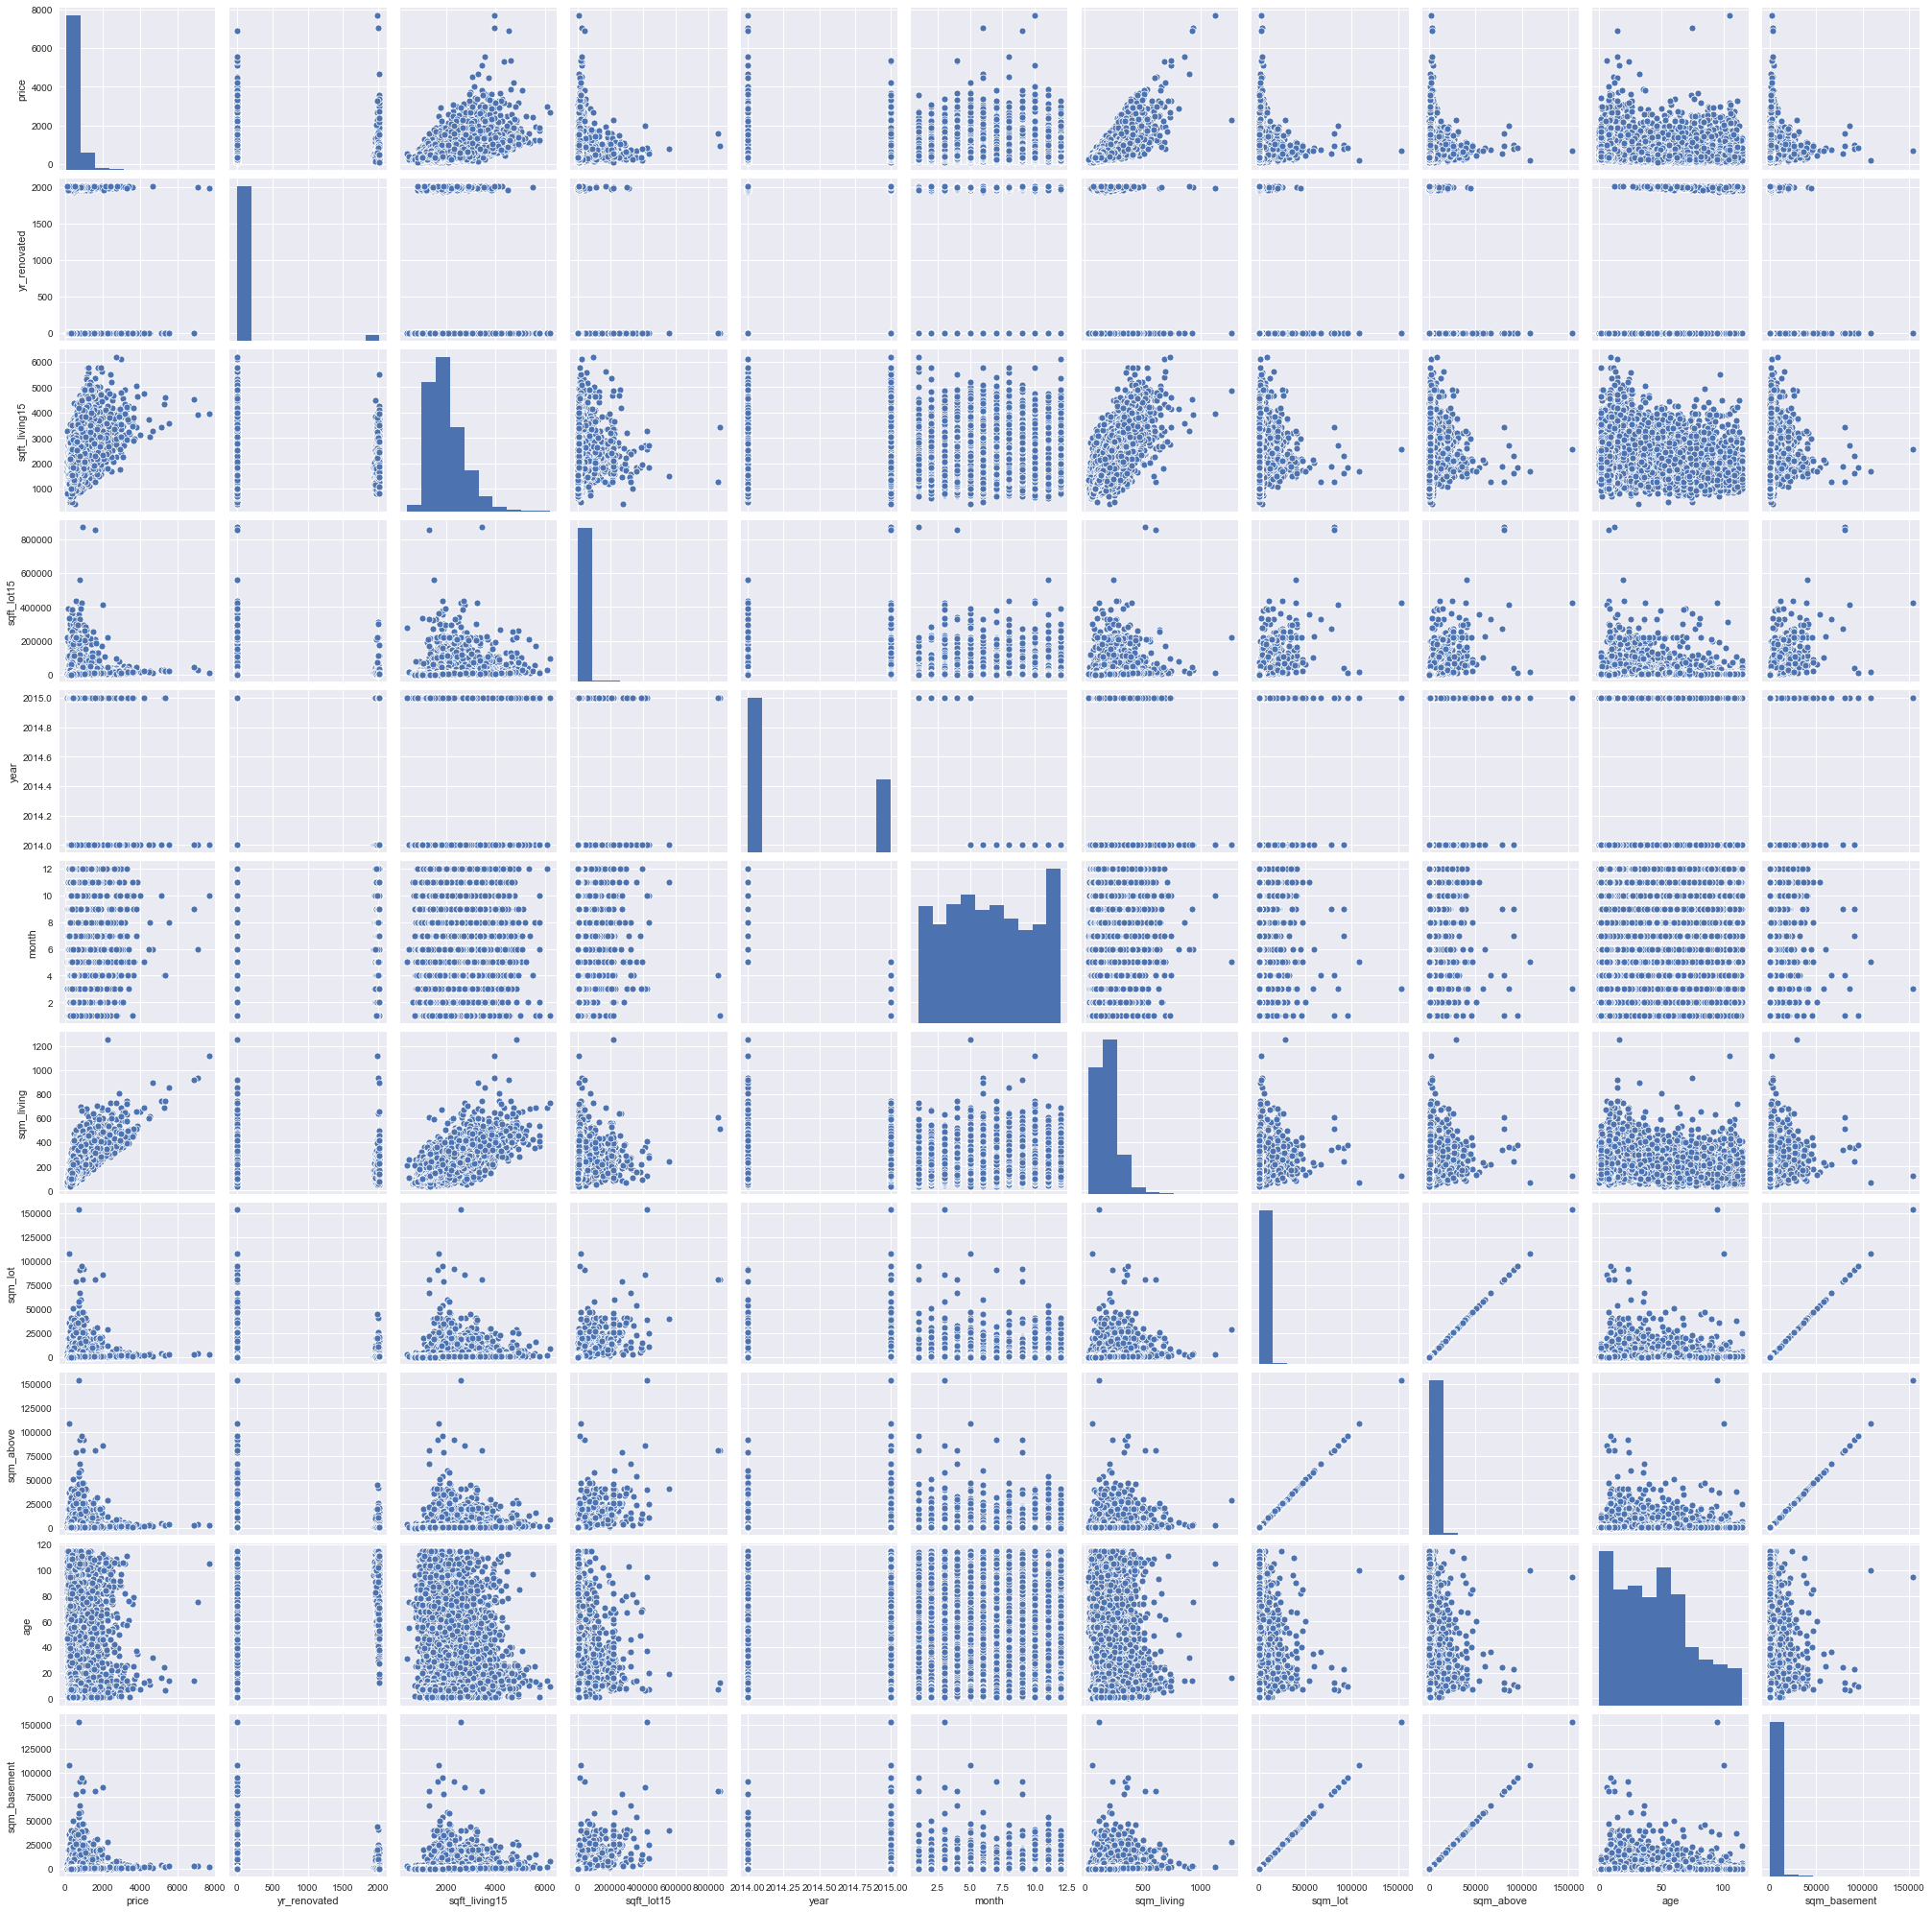

In [197]:
g = sns.pairplot(property[['price', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'year', 'month', 'sqm_living', 'sqm_lot', 'sqm_above', 'age', 'sqm_basement']])

/Users/raphaelaboll/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/Users/raphaelaboll/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

/Users/raphaelaboll/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/Users/raphaelaboll/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning:


The colNum attribute 

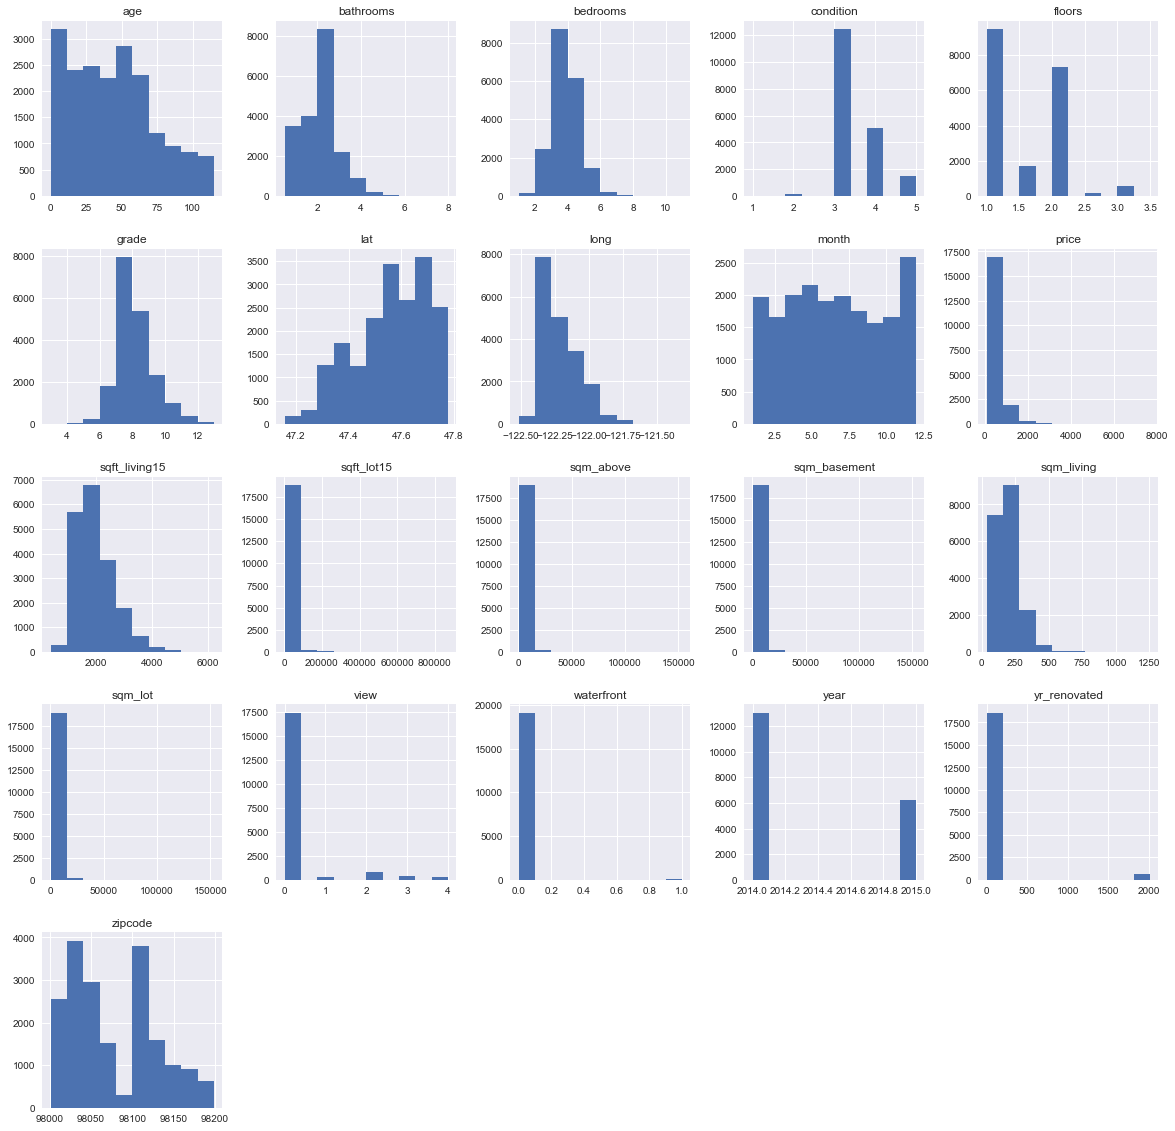

In [199]:
_ = property.hist(figsize=(20,20));

In [200]:
# basic statistics
property.describe().round(2)

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_renovated,zipcode,...,long,sqft_living15,sqft_lot15,year,month,sqm_living,sqm_lot,sqm_above,age,sqm_basement
count,19220.00,19220.00,19220.00,19220.00,19220.00,19220.00,19220.00,19220.00,19220.00,19220.00,...,19220.00,19220.00,19220.00,19220.00,19220.00,19220.00,19220.00,19220.00,19220.00,19220.00
mean,541.63,3.37,2.12,1.50,0.01,0.23,3.41,7.66,67.71,98077.74,...,-122.21,1987.41,12807.11,2014.32,6.58,193.47,1400.44,1400.44,43.96,1400.44
std,372.26,0.90,0.77,0.54,0.09,0.76,0.65,1.18,361.37,53.46,...,0.14,684.73,27577.50,0.47,3.12,85.71,3792.14,3792.14,29.38,3792.14
min,78.00,1.00,0.50,1.00,0.00,0.00,1.00,3.00,0.00,98001.00,...,-122.52,399.00,651.00,2014.00,1.00,34.37,48.31,48.31,0.00,48.31
25%,322.00,3.00,1.75,1.00,0.00,0.00,3.00,7.00,0.00,98033.00,...,-122.33,1490.00,5100.00,2014.00,4.00,132.85,468.23,468.23,18.00,468.23
50%,450.00,3.00,2.25,1.50,0.00,0.00,3.00,7.00,0.00,98065.00,...,-122.23,1840.00,7620.00,2014.00,6.00,178.37,707.92,707.92,40.00,707.92
75%,644.12,4.00,2.50,2.00,0.00,0.00,4.00,8.00,0.00,98117.00,...,-122.12,2360.00,10092.00,2015.00,9.00,236.90,995.64,995.64,64.00,995.64
max,7700.00,11.00,8.00,3.50,1.00,4.00,5.00,13.00,2015.00,98199.00,...,-121.32,6210.00,871200.00,2015.00,12.00,1257.91,153416.21,153416.21,115.00,153416.21


**Conclusions / anything importand**
- price is between 78000 (min) and 7700000 (max) 
- yr built is between 1900 (min) and 2015 (max)
    

## Data Exploration - Take a closer look on details

### Take a closer look on price

In [201]:
property.price.describe().round(2)

count    19220.00
mean       541.63
std        372.26
min         78.00
25%        322.00
50%        450.00
75%        644.12
max       7700.00
Name: price, dtype: float64

- Minimum: 78.000.00 
- Max 7.700.000.00 
- Average 450.000.00

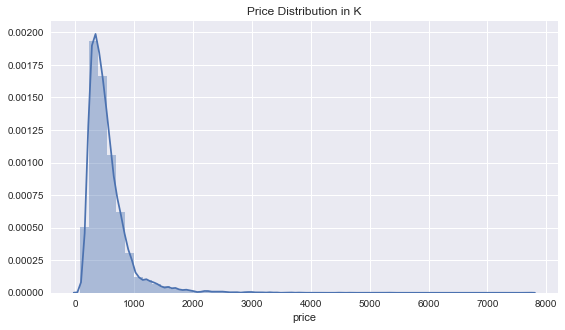

In [285]:
plt.figure(figsize = (20, 5))
plt.subplot(121)
sns.distplot(property['price']);
plt.title('Price Distribution in K');

In [203]:
property.groupby('year')['price'].mean().round() 

year
2014    540.0
2015    545.0
Name: price, dtype: float64

**conclusion**: Increase of prices in 2015 (539K $) from 542K in 2014 

### Price per Squaremeter

In [204]:
# Price per sqm 
property["price_per_sqm_living"] = round(property.price/property.sqm_living, 2)
property["price_per_sqm_lot"] = round(property.price/property.sqm_lot, 2)
property.describe()[["price_per_sqm_living","price_per_sqm_lot"]]

,price_per_sqm_living,price_per_sqm_lot
count,19220.000000,19220.000000
mean,2.845962,0.958637
std,1.186957,1.014935
min,0.940000,0.000000
25%,1.960000,0.360000
50%,2.640000,0.640000
75%,3.430000,1.160000
max,8.720000,21.740000


In [205]:
# plt.hist(property["price_per_sqm_living"])
#plt.title("Price per sqm living")
#plt.xlabel("price")
#plt.ylabel("count");

### Take a closer look at the cities and price 

In [206]:
# Top 10 cities
cities_prop = property["city"].value_counts() 
cities_prop

Seattle          7972
Renton           1405
Bellevue         1256
Kent             1080
Redmond           868
Kirkland          860
Auburn            817
Sammamish         708
Federal Way       702
Issaquah          665
Maple Valley      528
Woodinville       418
Snoqualmie        279
Kenmore           255
Mercer Island     246
Enumclaw          209
North Bend        189
Bothell           175
Duvall            167
Carnation         110
Vashon            106
Black Diamond      87
Fall City          73
Medina             45
Name: city, dtype: int64

In [207]:
city_price = property.groupby('city')['price'].mean().round() 
city_price.nlargest(5)

city
Medina           2169.0
Mercer Island    1199.0
Bellevue          910.0
Sammamish         734.0
Redmond           656.0
Name: price, dtype: float64

In [208]:
city_price = property.groupby('city')['price'].mean().round() 
city_price.nsmallest(5)

city
Federal Way     288.0
Auburn          291.0
Kent            299.0
Enumclaw        316.0
Maple Valley    366.0
Name: price, dtype: float64

In [209]:
city_price = property.groupby('city')['price'].mean().round() 
city_price.sort_values()

city
Federal Way       288.0
Auburn            291.0
Kent              299.0
Enumclaw          316.0
Maple Valley      366.0
Renton            406.0
Black Diamond     425.0
Duvall            430.0
North Bend        444.0
Kenmore           460.0
Carnation         471.0
Vashon            485.0
Bothell           492.0
Snoqualmie        530.0
Seattle           538.0
Fall City         549.0
Issaquah          610.0
Woodinville       617.0
Kirkland          647.0
Redmond           656.0
Sammamish         734.0
Bellevue          910.0
Mercer Island    1199.0
Medina           2169.0
Name: price, dtype: float64

In [210]:
# Reminder: need to plot a map - go on with the idea 'distance to airport'

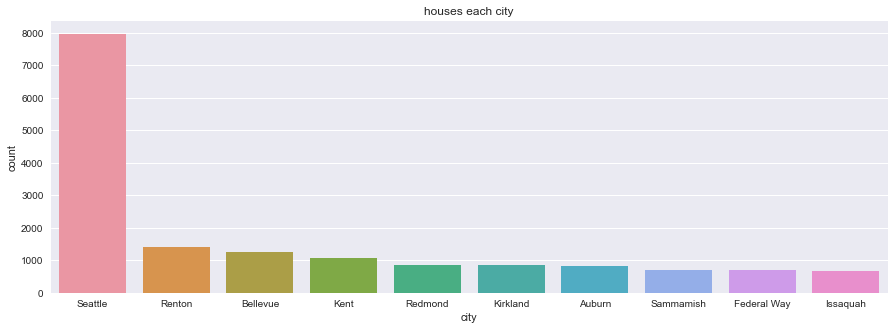

In [211]:
plt.subplots(figsize=(15, 5))
sns.countplot(x='city',data=property,order=pd.value_counts(property['city']).iloc[:10].index)
plt.title('houses each city')
plt.show()

In [212]:
property.zipcode.unique()

array([98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146, 98038,
       98115, 98107, 98126, 98019, 98103, 98002, 98133, 98040, 98092,
       98030, 98119, 98112, 98052, 98027, 98117, 98058, 98001, 98056,
       98166, 98023, 98007, 98070, 98148, 98105, 98042, 98008, 98059,
       98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010, 98118,
       98199, 98032, 98045, 98102, 98077, 98108, 98178, 98177, 98065,
       98029, 98006, 98109, 98022, 98033, 98155, 98024, 98168, 98011,
       98031, 98106, 98072, 98188, 98055, 98014, 98039])

### Take a closer look at sqm_living and price 

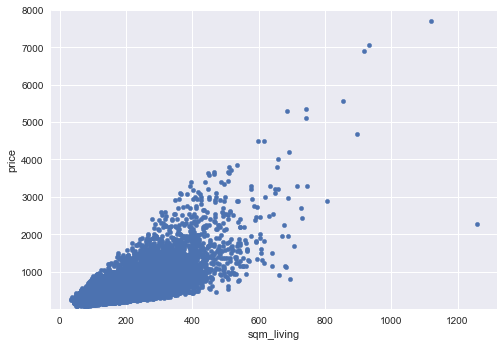

In [213]:
property.plot(x='sqm_living', y='price', kind='scatter', ylim=(3,8000));

In [214]:
property.price.corr(property.sqm_living)

0.7046651197900545

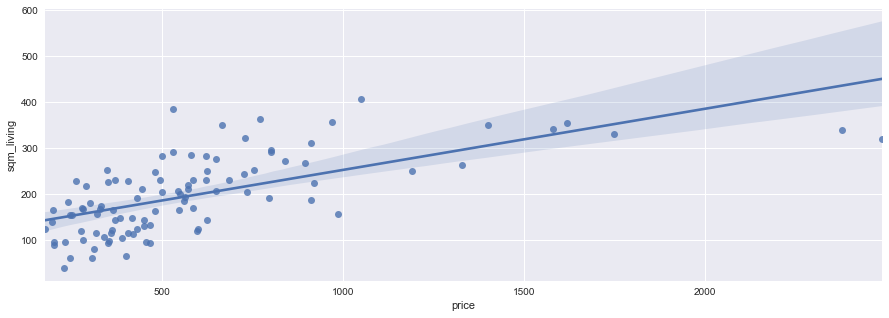

In [215]:
f, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x="price", y="sqm_living", data=train_prop.iloc[0:100,:]);

**conclusion**: correlation - when sqm_living increases the price increases as well. 

### Take a closer look at long and lat

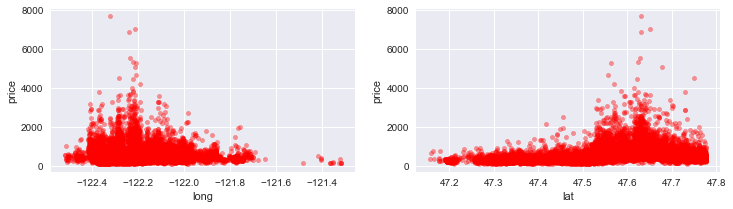

In [216]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

for xcol, ax in zip([ 'long', 'lat'], axes):
    property.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='r')

Looks like if there is a long at -122.2 where you can find the most expensive houses?

### Take a closer look at grade and condition

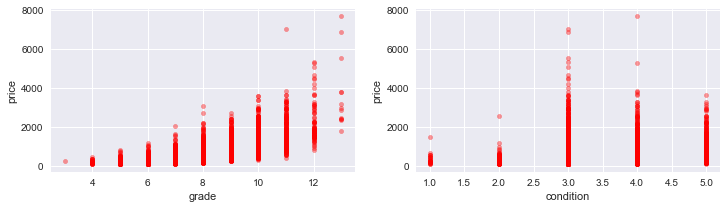

In [217]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

for xcol, ax in zip([ 'grade', 'condition'], axes):
    property.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='r')

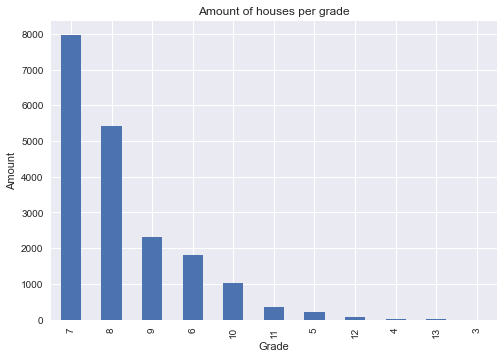

In [218]:
grad_count= property.grade.value_counts()
grad_count.plot(kind='bar')
plt.title('Amount of houses per grade')
plt.ylabel('Amount')
plt.xlabel('Grade');

In [286]:
# plt.subplots(figsize=(15, 5))
# sns.countplot(property["grade"])
# plt.show()

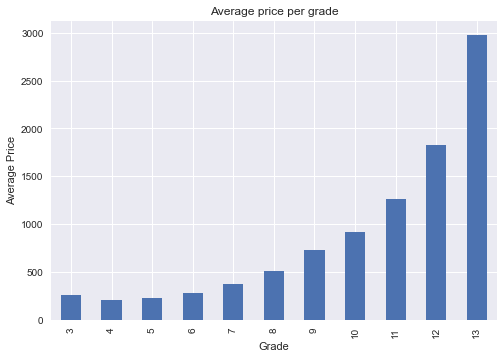

In [220]:
avg_grade = property.groupby('grade').price.median()
avg_grade.plot(kind='bar');
plt.title('Average price per grade')
plt.ylabel('Average Price')
plt.xlabel('Grade');

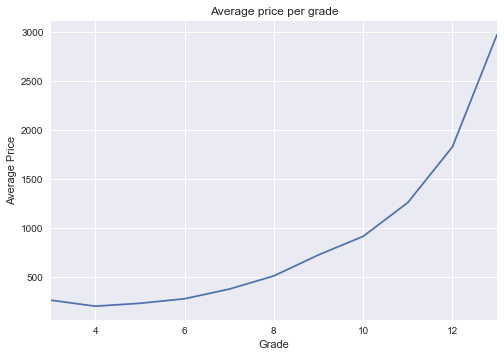

In [221]:
avg_grade.plot()
plt.title('Average price per grade')
plt.ylabel('Average Price')
plt.xlabel('Grade');

In [222]:
property.price.corr(property.grade)

0.6672383543579428

**Conclusion:** 
- Grades between 3 and 13 
- Most of the houses do have a grade 7 
- Price increase per grade

### Take a closer look at sqft_living15 and sqft_lot15 and price

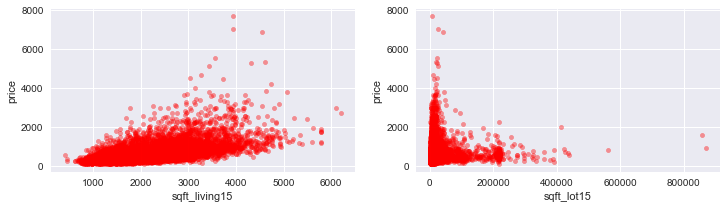

In [223]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

for xcol, ax in zip([ 'sqft_living15', 'sqft_lot15'], axes):
    property.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='r')

Looks like if there is a correlation between sqft_living15 and price. 

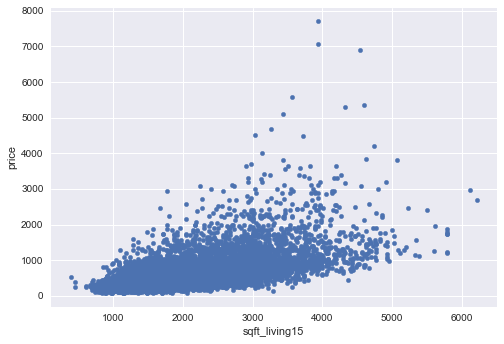

In [224]:
property.plot(x='sqft_living15', 
          y='price', 
          kind='scatter');

In [225]:
property.price.corr(property.sqft_living15)

0.5821949668970744

### Take a closer look at bathrooms, bedrooms, floor and price

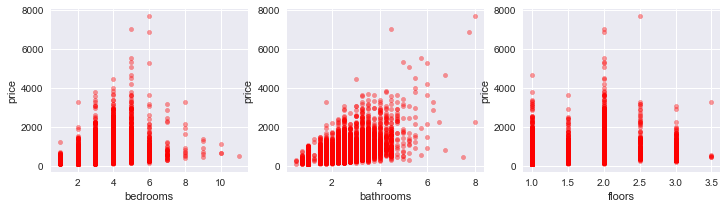

In [226]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))

for xcol, ax in zip([ 'bedrooms', 'bathrooms', 'floors'], axes):
    property.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='r')

**Conclusion**
- Seems like there is no linear relationship between bedrooms and price as well as floors an price. 
- Looks like if there is a linear relationship between bathrooms and price

In [287]:
# plt.subplots(figsize=(15, 5))
# sns.countplot(property["bathrooms"])
# plt.show()

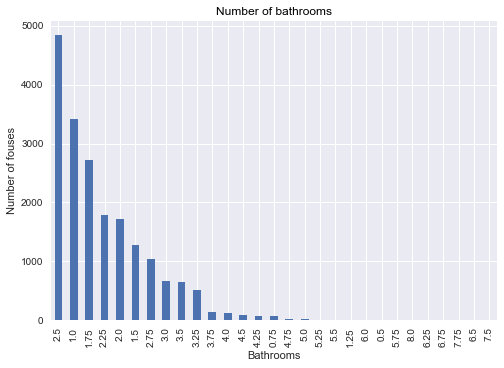

In [228]:
property.bathrooms.value_counts().plot(kind='bar');
plt.title('Number of bathrooms', color='black')
plt.xlabel('Bathrooms')
plt.ylabel('Number of fouses');

In [229]:
bathroom_price = property.groupby('bathrooms')['price'].mean().round() 
bathroom_price.sort_values()

bathrooms
0.50     237.0
0.75     292.0
1.00     347.0
1.50     409.0
7.50     450.0
1.75     455.0
2.00     459.0
2.25     536.0
2.50     554.0
1.25     635.0
2.75     660.0
3.00     712.0
3.50     933.0
3.25     972.0
3.75    1198.0
4.00    1318.0
4.50    1346.0
4.25    1510.0
5.25    1775.0
5.00    1834.0
4.75    2038.0
6.50    2240.0
5.50    2522.0
5.75    2683.0
6.75    2735.0
6.00    2948.0
6.25    3095.0
8.00    4990.0
7.75    6890.0
Name: price, dtype: float64

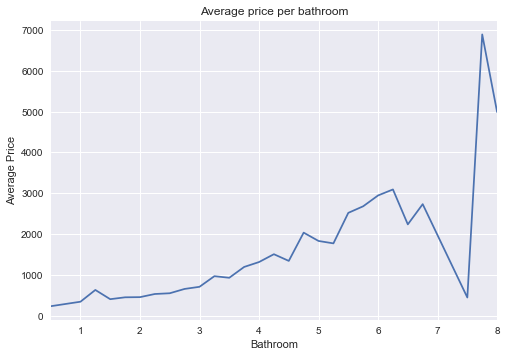

In [230]:
bathroom_price.plot()
plt.title('Average price per bathroom')
plt.ylabel('Average Price')
plt.xlabel('Bathroom');

In [231]:
property.price.corr(property.bathrooms)

0.5273604786664854

**Conclusion:**
- adding an extra bathroom is expensive
- 1.25 bathrooms is more expensive - better choose 1 or up to 2.25 bathrooms

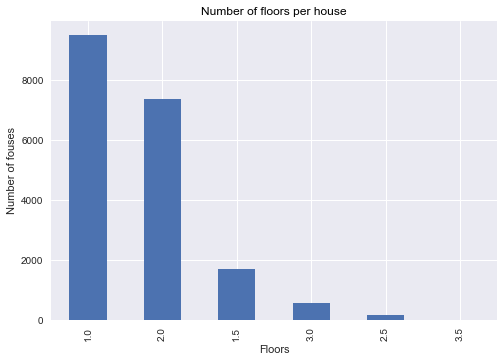

In [232]:
property.floors.value_counts().plot(kind='bar');
plt.title('Number of floors per house', color='black')
plt.xlabel('Floors')
plt.ylabel('Number of fouses');

In [233]:
floor_price = property.groupby('floors')['price'].mean().round() 
floor_price.sort_values()

floors
1.0     442.0
1.5     559.0
3.0     588.0
2.0     652.0
3.5     968.0
2.5    1083.0
Name: price, dtype: float64

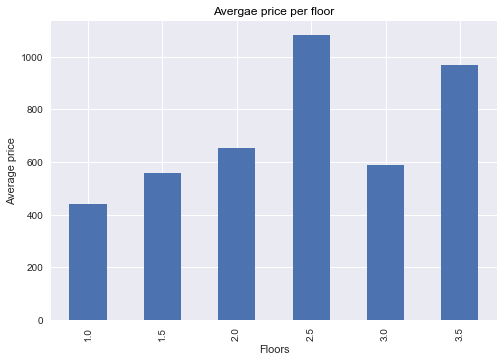

In [234]:
floor_price.plot(kind='bar');
plt.title('Avergae price per floor', color='black')
plt.xlabel('Floors')
plt.ylabel('Average price');

### Take a closer look on age and year renovated

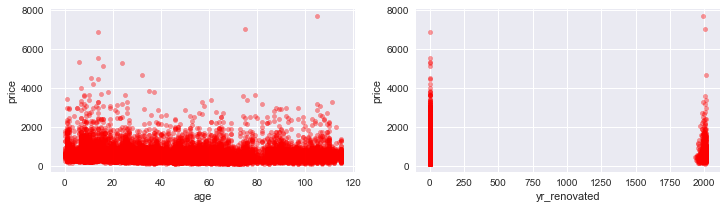

In [235]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

for xcol, ax in zip([ 'age', 'yr_renovated'], axes):
    property.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='r')

In [236]:
property.age.describe()

count    19220.000000
mean        43.958949
std         29.384919
min          0.000000
25%         18.000000
50%         40.000000
75%         64.000000
max        115.000000
Name: age, dtype: float64

In [237]:
age_bins = np.arange(0, 115 + ((115 - 0) / 10), (115-0) / 10)
age_series = pd.cut(property['age'], bins=age_bins,labels=age_bins[:-1])
age_series.name = 'age_bin'

In [238]:
# print it 
# age_series

In [239]:
property = property.join(age_series)

In [240]:
property.age_bin.value_counts()

0.0      3149
46.0     2607
11.5     2573
34.5     2492
57.5     2403
23.0     2304
69.0     1093
80.5     1038
103.5     765
92.0      763
Name: age_bin, dtype: int64

/Users/raphaelaboll/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning:

FixedFormatter should only be used together with FixedLocator



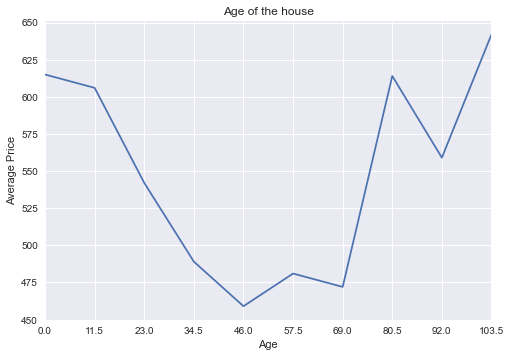

In [243]:
age_price.plot()
plt.title('Age of the house')
plt.ylabel('Average Price')
plt.xlabel('Age');

Text(0.5, 0, 'Age')

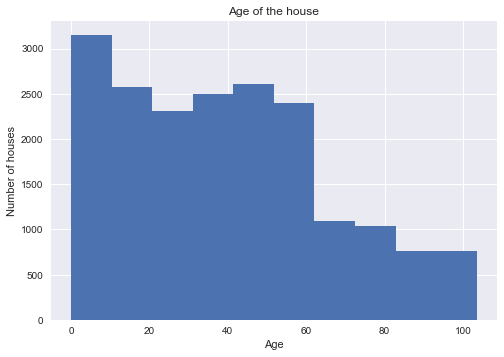

In [241]:
property.age_bin.hist()
plt.title('Age of the house')
plt.ylabel('Number of houses')
plt.xlabel('Age')

In [242]:
age_price = property.groupby('age_bin')['price'].mean().round() 
age_price.sort_values()

age_bin
46.0     459.0
69.0     472.0
57.5     481.0
34.5     489.0
23.0     542.0
92.0     559.0
11.5     606.0
80.5     614.0
0.0      615.0
103.5    642.0
Name: price, dtype: float64

### Take a closer look at view and price

**Will leave it** - dont get what its about. Maybe get back to it later.

In [244]:
# property['view'].value_counts()

In [245]:
# property.plot(x='view', 
          # y='price', 
          # kind='scatter');
# plt.xlabel("view", fontsize=12)
# plt.ylabel("Price ($)", fontsize=12)
# plt.xticks(fontsize=13)
# plt.yticks(fontsize=13);

In [246]:
# property.price.corr(train_prop.view)

### Take a closer look at month

In [289]:
# property.month.unique()

In [248]:
# take a look on the month. Are there any corrleations
property.month.value_counts()

5     2161
4     1992
7     1978
6     1908
8     1749
3     1659
10    1655
9     1560
12    1320
11    1270
2     1101
1      867
Name: month, dtype: int64

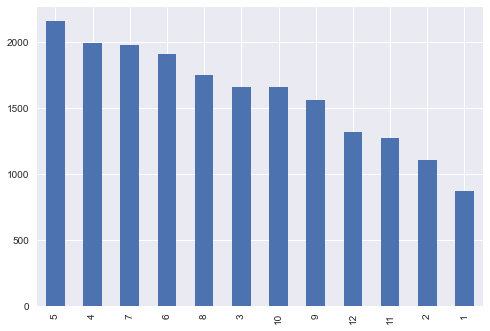

In [288]:
# take a look on the month. Are there any corrleations
property.month.value_counts().plot(kind='bar');

**Conclusion**: 
- In may most of the houses were sold 
- Followed by april and june

In [250]:
monthly_price = property.groupby('month')['price'].mean().round() 
monthly_price.sort_values()

month
2     510.0
11    523.0
1     526.0
12    528.0
9     529.0
8     537.0
7     544.0
10    544.0
3     546.0
5     552.0
6     557.0
4     567.0
Name: price, dtype: float64

**conclusion**: 
- You should buy a house during the winter, in februray the average price is the lowest (509) 
- In summer e.g. in april the price is the highest (562$)

### Take a closer look at waterfront and price

Need to come back later - lack of time

In [251]:
property.waterfront.value_counts()

0.0    19074
1.0      146
Name: waterfront, dtype: int64

In [252]:
# property[property['waterfront'] == 1.0]

In [253]:
property.waterfront.unique()

array([0., 1.])

### Splitting the Data & preparing regression

In [254]:
# 1. split to train und test  
train_prop, test_prop = train_test_split(property, test_size=0.2)

In [255]:
train_prop.shape

(15376, 25)

In [256]:
# train_prop.info()

**keep in minbd**: 
There are 2 features which are obviously categorical 
- "age_bin" 
- "city"
But there might be some more, thats why i made the following classification.

In [257]:
continuous_var = ['price', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'year', 'month', 'sqm_living', 'sqm_lot', 'sqm_above', 'age', 'sqm_basement']
categorical_var = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'grade', 'city', 'zipcode']

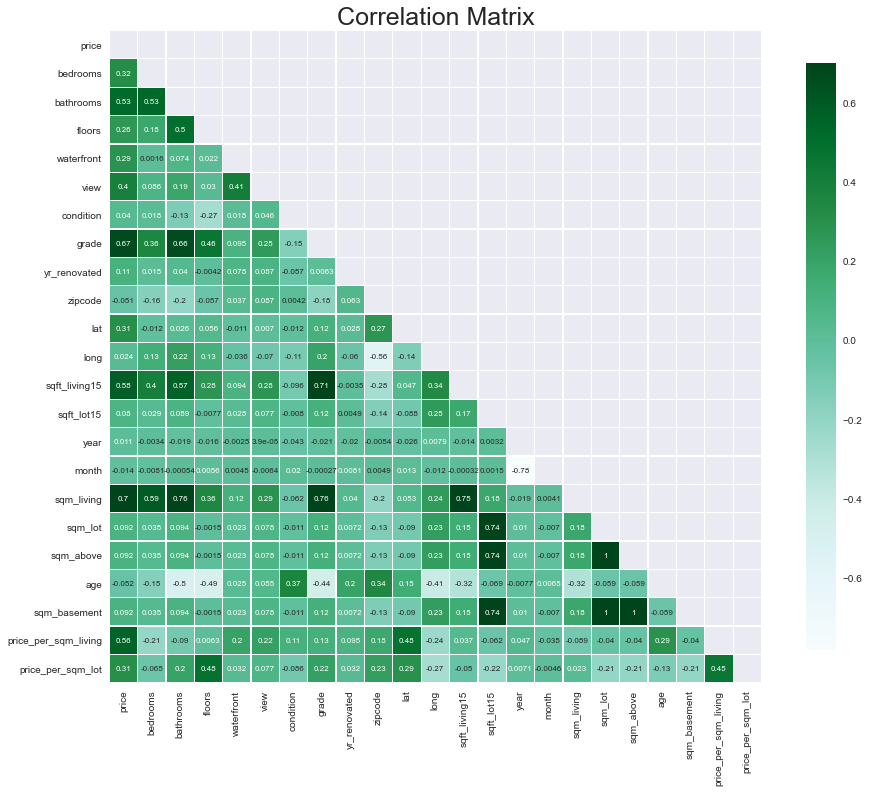

In [258]:
mask = np.zeros_like(train_prop.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Correlation Matrix',fontsize=25)

sns.heatmap(train_prop.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

In [259]:
# features 
X = train_prop[['month', 'sqm_living', 'grade', 'sqft_living15', 'yr_renovated', 'sqm_lot', 'sqm_above', 'age', 'sqm_basement']]

In [260]:
# label 
Y = train_prop['price']

In [261]:
property[['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'sqm_living', 'sqm_lot',
       'sqm_above', 'age', 'city', 'sqm_basement']].corr()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_renovated,zipcode,...,long,sqft_living15,sqft_lot15,year,month,sqm_living,sqm_lot,sqm_above,age,sqm_basement
price,1.000000,0.317742,0.527360,0.258295,0.276297,0.393546,0.038010,0.667238,0.111211,-0.050219,...,0.021402,0.582195,0.081248,0.005445,-0.010274,0.704665,0.087008,0.087008,-0.053537,0.087008
bedrooms,0.317742,1.000000,0.531243,0.188995,-0.002303,0.086172,0.021583,0.370907,0.017672,-0.156819,...,0.136691,0.405599,0.029003,-0.007747,-0.001093,0.595019,0.030598,0.030598,-0.163255,0.030598
bathrooms,0.527360,0.531243,1.000000,0.506205,0.067281,0.186573,-0.126387,0.666886,0.043524,-0.202151,...,0.223551,0.570054,0.085885,-0.025922,0.008100,0.756338,0.085089,0.085089,-0.507005,0.085089
floors,0.258295,0.188995,0.506205,1.000000,0.021879,0.029174,-0.263421,0.458104,-0.000083,-0.058871,...,0.127809,0.280888,-0.011008,-0.019253,0.011833,0.357171,-0.007257,-0.007257,-0.490232,-0.007257
waterfront,0.276297,-0.002303,0.067281,0.021879,1.000000,0.405107,0.017656,0.087381,0.079244,0.031059,...,-0.039869,0.088858,0.032000,-0.005166,0.008469,0.110229,0.023142,0.023142,0.026083,0.023142
view,0.393546,0.086172,0.186573,0.029174,0.405107,1.000000,0.047135,0.248320,0.088382,0.087655,...,-0.077350,0.276220,0.070926,0.000246,-0.006130,0.285188,0.070778,0.070778,0.055795,0.070778
condition,0.038010,0.021583,-0.126387,-0.263421,0.017656,0.047135,1.000000,-0.144465,-0.054896,0.001130,...,-0.105415,-0.092595,-0.005384,-0.044971,0.019504,-0.057412,-0.014087,-0.014087,0.361943,-0.014087
grade,0.667238,0.370907,0.666886,0.458104,0.087381,0.248320,-0.144465,1.000000,0.011594,-0.184366,...,0.198533,0.714039,0.120191,-0.027056,0.006827,0.764050,0.114572,0.114572,-0.446286,0.114572
yr_renovated,0.111211,0.017672,0.043524,-0.000083,0.079244,0.088382,-0.054896,0.011594,1.000000,0.061170,...,-0.063212,-0.003830,0.002863,-0.020337,0.009274,0.045997,0.002865,0.002865,0.201335,0.002865
zipcode,-0.050219,-0.156819,-0.202151,-0.058871,0.031059,0.087655,0.001130,-0.184366,0.061170,1.000000,...,-0.562441,-0.278198,-0.146139,0.001688,0.000047,-0.196385,-0.129718,-0.129718,0.346023,-0.129718


**Set Dummies**

In [262]:
bath_dummies = pd.get_dummies(train_prop['bathrooms'], prefix='bath', drop_first=True)
fl_dummies = pd.get_dummies(train_prop['floors'], prefix='fl', drop_first=True)
wat_dummies = pd.get_dummies(train_prop['waterfront'], prefix='wat', drop_first=True)
grade_dummies = pd.get_dummies(train_prop['grade'], prefix='grade', drop_first=True)
city_dummies = pd.get_dummies(train_prop['city'], prefix='cit', drop_first=True)

In [263]:
train_prop.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'sqm_living', 'sqm_lot',
       'sqm_above', 'age', 'city', 'sqm_basement', 'price_per_sqm_living',
       'price_per_sqm_lot', 'age_bin'],
      dtype='object')

### Linear Regression

The variables I can choose for the first impression of the R-squared value. 

['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'sqm_living', 'sqm_lot',
       'sqm_above', 'age', 'city', 'sqm_basement', 'price_per_sqm_living',
       'price_per_sqm_lot', 'age_bin']


In [264]:
# train_prop.columns

In [292]:
print('R squared for each possible explanatory variable:' )
for var in continuous_var+categorical_var:
    model = 'price ~ {:}'.format(var)
    rs = smf.ols(formula=model, data=train_prop).fit().rsquared
    print('{:20s} \t \t= {:.3}'.format(var, rs))

R squared for each possible explanatory variable:
price                	 	= 1.0
yr_renovated         	 	= 0.0111
sqft_living15        	 	= 0.336
sqft_lot15           	 	= 0.00645
year                 	 	= 0.000113
month                	 	= 0.000203
sqm_living           	 	= 0.492
sqm_lot              	 	= 0.00848
sqm_above            	 	= 0.00848
age                  	 	= 0.00275
sqm_basement         	 	= 0.00848
bedrooms             	 	= 0.1
bathrooms            	 	= 0.277
floors               	 	= 0.0677
waterfront           	 	= 0.0832
view                 	 	= 0.157
grade                	 	= 0.447
city                 	 	= 0.259
zipcode              	 	= 0.00256


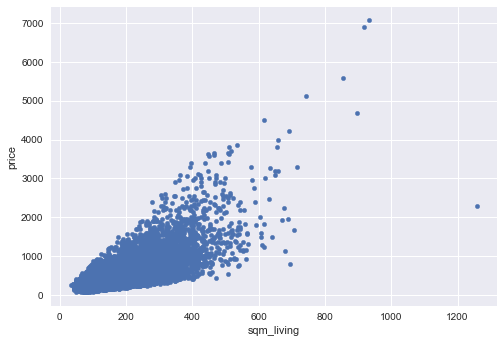

In [266]:
train_prop.plot(x='sqm_living', y='price', kind='scatter');

In [267]:
# fig = train_prop.plot(x='sqm_living', 
                # y='price', 
                # kind='scatter')
# plt.plot(np.unique(train_prop.sqm_living), \
         # np.poly1d(np.polyfit(train_prop.sqm_living, train_prop.price, 1))\
         # (np.unique(train_prop.sqm_living)));

In [268]:
# f, ax = plt.subplots(figsize=(10, 8))
# sns.regplot(x="sqm_living", y="price", data=train_prop.iloc[0:100,:]);

In [269]:
# fig = train_prop.plot(x='bedrooms', 
                # y='price', 
                # kind='scatter')
# plt.plot(np.unique(train_prop.sqm_living), \
         # np.poly1d(np.polyfit(train_prop.sqm_living, train_prop.price, 1))\
         # (np.unique(train_prop.sqm_living)));

In [270]:
# f, ax = plt.subplots(figsize=(10, 8))
# sns.regplot(x="bedrooms", y="price", data=train_prop.iloc[0:100,:]);

In [271]:
X1 = train_prop[['sqm_living']]
X1 = sms.add_constant(X1)
Y1 = train_prop.price

/Users/raphaelaboll/opt/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [272]:
model = sms.OLS(Y1, X1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.488e+04
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:11:40   Log-Likelihood:            -1.0744e+05
No. Observations:               15376   AIC:                         2.149e+05
Df Residuals:                   15374   BIC:                         2.149e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -45.0840      5.249     -8.589      0.000     -55.373     -34.795
sqm_living     3.0327      0.025    121.970      0.000       2.984       3.081
==============================================================================
Omnibus:                    10239.019   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           331116.748
Skew:                           2.739   Prob(JB):                         0.00
Kurtosis:                      25.064   Cond. No.                         524.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [273]:
X2 = train_prop[['grade']]
X2 = sms.add_constant(X2)
Y2 = train_prop.price

In [274]:
model = sms.OLS(Y2, X2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                 1.242e+04
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:11:40   Log-Likelihood:            -1.0809e+05
No. Observations:               15376   AIC:                         2.162e+05
Df Residuals:                   15374   BIC:                         2.162e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1069.1028     14.613    -73.161      0.000   -1097.746   -1040.460
grade        210.1130      1.885    111.456      0.000     206.418     213.808
==============================================================================
Omnibus:                    13572.183   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1125104.572
Skew:                           3.870   Prob(JB):                         0.00
Kurtosis:                      44.185   Cond. No.                         52.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**
- R-squared is not that high = 0.492 there is a light correlation 
- The value is low, we can improve the model by including more features
- the p value is = 0 so it's significant 

**Least squares line**
-  estimating the price if the sqm_living is 194

In [281]:
y = 194 * 3.0327 - 45.0840
y

543.2598

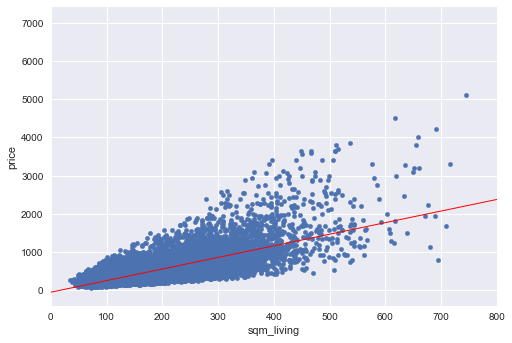

In [283]:
intercept, slope = - 45.0840, 3.0327
ax = train_prop.plot('sqm_living', 'price', kind='scatter')
xx = np.linspace(0, 800, 10)
ax.plot(xx, xx*slope + intercept, color='red', lw=1)
ax.set_xlim([0,800]);

### Multiple Regression
- using a combination of features to predict the price
- using features highly correlated to the "price" 
- e.g. trying it with the following features ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'grade', 'lat', 'sqft_living15', 'sqm_living']
- keep an eye on overfitting / try different combination of features

In [277]:
train_prop[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'grade', 'lat', 'sqft_living15', 'sqm_living', 'price']].corr()

,bedrooms,bathrooms,floors,waterfront,view,grade,lat,sqft_living15,sqm_living,price
bedrooms,1.000000,0.528399,0.180459,0.001552,0.085715,0.363998,-0.012012,0.399008,0.592360,0.316598
bathrooms,0.528399,1.000000,0.501287,0.074167,0.186490,0.663774,0.026275,0.566443,0.755520,0.525956
floors,0.180459,0.501287,1.000000,0.022170,0.030331,0.456991,0.055866,0.276560,0.357480,0.260201
waterfront,0.001552,0.074167,0.022170,1.000000,0.413071,0.095088,-0.010767,0.093653,0.121255,0.288399
view,0.085715,0.186490,0.030331,0.413071,1.000000,0.250038,0.007002,0.276372,0.288187,0.396443
grade,0.363998,0.663774,0.456991,0.095088,0.250038,1.000000,0.116665,0.710024,0.761916,0.668513
lat,-0.012012,0.026275,0.055866,-0.010767,0.007002,0.116665,1.000000,0.046546,0.052928,0.310768
sqft_living15,0.399008,0.566443,0.276560,0.093653,0.276372,0.710024,0.046546,1.000000,0.751287,0.579805
sqm_living,0.592360,0.755520,0.357480,0.121255,0.288187,0.761916,0.052928,0.751287,1.000000,0.701272
price,0.316598,0.525956,0.260201,0.288399,0.396443,0.668513,0.310768,0.579805,0.701272,1.000000


In [278]:
X1 = train_prop[['bedrooms', 'bathrooms', 'floors', 'grade', 'lat', 'sqft_living15', 'sqm_living', 'view', 'waterfront']]

X1 = sm.add_constant(X1)
Y1 = train_prop.price

model = sm.OLS(Y1, X1)
results = model.fit()
results.summary()

/Users/raphaelaboll/opt/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     3331.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:11:41   Log-Likelihood:            -1.0432e+05
No. Observations:               15376   AIC:                         2.087e+05
Df Residuals:                   15366   BIC:                         2.087e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.265e+04    595.911    -54.790      0.000   -3.38e+04   -3.15e+04
bedrooms        -26.8866      2.462    -10.922      0.000     -31.712     -22.061
bathrooms        -1.8725      3.820     -0.490      0.624      -9.359       5.614
floors          -29.1865      3.846     -7.589      0.000     -36.725     -21.648
grade            83.5617      2.611     32.004      0.000      78.444      88.680
lat             678.2914     12.559     54.010      0.000     653.675     702.908
sqft_living15     0.0045      0.004      1.098      0.272      -0.004       0.012
sqm_living        2.0753      0.044     46.733      0.000       1.988       2.162
view             63.4902      2.608     24.348      0.000      58.379      68.602
waterfront      642.5443     21.589     29.763      0.000     600.228     684.861
==============================================================================
Omnibus:                    12052.681   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           779379.265
Skew:                           3.257   Prob(JB):                         0.00
Kurtosis:                      37.265   Cond. No.                     7.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R-squared = 0.661 thats ok but our goal is to get 0.7 < R.squared < 0.9
- the p-value for bathrooms is very high. I will delet it same for sqft_living15

In [279]:
X2 = train_prop[['bedrooms', 'floors', 'grade', 'lat', 'sqm_living', 'view', 'waterfront']]

X2 = sm.add_constant(X2)
Y2 = train_prop.price

model = sm.OLS(Y2, X2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     4283.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:11:42   Log-Likelihood:            -1.0432e+05
No. Observations:               15376   AIC:                         2.087e+05
Df Residuals:                   15368   BIC:                         2.087e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.264e+04    595.081    -54.856      0.000   -3.38e+04   -3.15e+04
bedrooms     -27.2062      2.411    -11.282      0.000     -31.933     -22.479
floors       -30.1710      3.608     -8.363      0.000     -37.243     -23.099
grade         84.3033      2.444     34.491      0.000      79.512      89.094
lat          678.1586     12.539     54.083      0.000     653.580     702.737
sqm_living     2.0856      0.037     55.652      0.000       2.012       2.159
view          63.7258      2.600     24.515      0.000      58.630      68.821
waterfront   641.7437     21.576     29.744      0.000     599.453     684.035
==============================================================================
Omnibus:                    12020.377   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           769738.784
Skew:                           3.247   Prob(JB):                         0.00
Kurtosis:                      37.049   Cond. No.                     7.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

adding further features 

In [280]:
X3 = train_prop[['bedrooms', 'floors', 'grade', 'lat', 'sqm_living', 'view', 'waterfront', 'age', 'year']]

X3 = sm.add_constant(X3)
Y3 = train_prop.price

model = sm.OLS(Y3, X3)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     3846.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:11:42   Log-Likelihood:            -1.0357e+05
No. Observations:               15376   AIC:                         2.072e+05
Df Residuals:                   15366   BIC:                         2.072e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.277e+04   7130.472    -11.609      0.000   -9.68e+04   -6.88e+04
bedrooms     -28.9587      2.297    -12.605      0.000     -33.462     -24.456
floors        21.7522      3.684      5.905      0.000      14.532      28.973
grade        110.2212      2.420     45.537      0.000     105.477     114.966
lat          559.6684     12.339     45.357      0.000     535.482     583.854
sqm_living     2.0609      0.036     57.722      0.000       1.991       2.131
view          48.2214      2.507     19.232      0.000      43.307      53.136
waterfront   636.2751     20.552     30.960      0.000     595.992     676.559
age            2.7439      0.070     39.029      0.000       2.606       2.882
year          27.4951      3.523      7.805      0.000      20.590      34.400
==============================================================================
Omnibus:                    12370.180   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           970224.229
Skew:                           3.330   Prob(JB):                         0.00
Kurtosis:                      41.341   Cond. No.                     8.78e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Conclusion 

Couldn't fullfill the requirement: 0.7 < R-squared < 0.9. So the results should be improved. 